In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


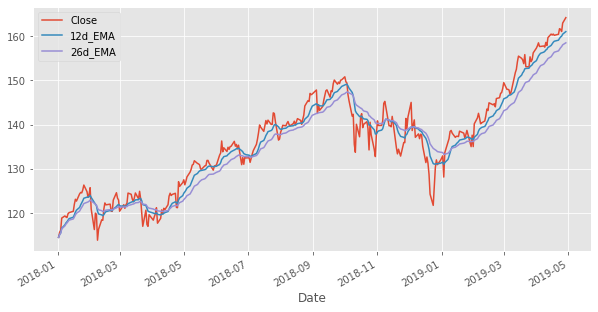

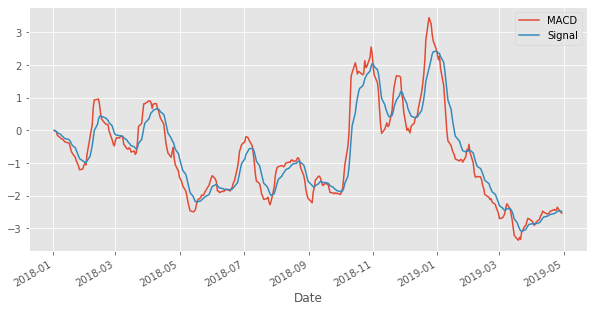

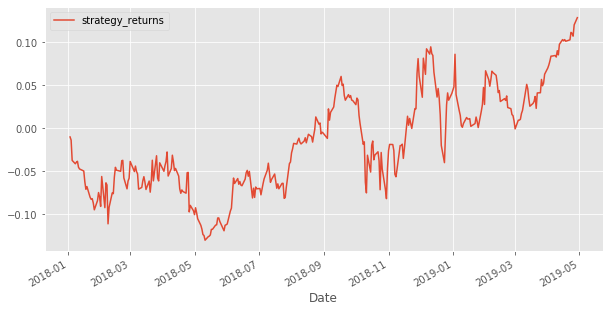

In [2]:
plt.style.use('ggplot')

data = yf.download("V", start="2018-01-01", end="2019-04-30")



# Visualize Visa and MA's
data['12d_EMA'] = data.Close.ewm(span=12).mean()
data['26d_EMA'] = data.Close.ewm(span=26).mean()
data[['Close','12d_EMA','26d_EMA']].plot(figsize=(10,5))
plt.show()

# Calculate MACD
data['MACD'] = data['26d_EMA'] - data['12d_EMA']
# Calculate Signal
data['Signal'] = data.MACD.ewm(span=9).mean()
data[['MACD','Signal']].plot(figsize=(10,5))
plt.show()

# Define Signal
data['trading_signal'] = np.where(data['MACD'] > data['Signal'], 1, -1)

# Calculate Returns
data['returns'] = data.Close.pct_change()

# Calculate Strategy Returns
data['strategy_returns'] = data.returns * data.trading_signal.shift(1)

# Calculate Cumulative Returns
cumulative_returns = (data.strategy_returns + 1).cumprod()-1

# Plot Strategy Returns
cumulative_returns.plot(figsize=(10,5))
plt.legend()
plt.show()